## Getting familiar with Pandas

In [0]:
## Pandas 
# there are several ways to change a column in a dataframe
# A short intro to pandas https://pandas.pydata.org/pandas-docs/stable/10min.html

import pandas as pd
import numpy as np
import random
import timeit

In [0]:
# First step: make the dataframe
dates = pd.date_range('20130101', '20140101') #366
data = pd.DataFrame(np.random.randn(366,4), index=dates, columns=list('ABCD'))

### Exercise 1.1: Inspect the dataframe with the following commands: head(), tail(), describe.

In [0]:
# Solution
data.head()

,A,B,C,D
2013-01-01,-0.865065,-1.323184,-2.060583,-1.093683
2013-01-02,-1.434577,2.695614,0.982652,0.769584
2013-01-03,-1.520955,-0.184620,1.768990,0.251867
2013-01-04,0.155172,-0.126022,-0.095785,-0.602780
2013-01-05,-0.584360,0.568325,-1.016321,0.447643


In [0]:
data.tail()

,A,B,C,D
2013-12-28,0.397898,0.354023,0.787082,-0.091770
2013-12-29,0.888595,-0.437082,-0.570970,0.515705
2013-12-30,-0.246886,0.575863,0.236348,0.606172
2013-12-31,-0.740922,-1.787007,-0.068582,0.804153
2014-01-01,-0.906857,0.956664,2.227654,1.137369


In [0]:
data.describe()

,A,B,C,D
count,366.000000,366.000000,366.000000,366.000000
mean,-0.038648,-0.068622,-0.033503,-0.111356
std,0.939546,0.994116,0.974423,1.020539
min,-3.252458,-3.182307,-2.967590,-2.828728
25%,-0.607056,-0.777271,-0.650711,-0.824148
50%,-0.014083,-0.147942,-0.065393,-0.167854
75%,0.591228,0.589572,0.603573,0.584311
max,3.014765,2.761000,2.798826,2.784084


### Exercise 1.2:  The index is a time series, and pandas has a build-in command for re-sampling dataframes (documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html).  Use resample to get the median every 2 days and save this as a new dataframe.

In [0]:
#Solution: 
data2 = data.resample('2D').median()
data2.head()

,A,B,C,D
2013-01-01,-1.149821,0.686215,-0.538965,-0.162050
2013-01-03,-0.682891,-0.155321,0.836603,-0.175456
2013-01-05,-0.067507,-0.139621,-0.851468,-0.502497
2013-01-07,-0.461183,0.974751,-0.855159,0.132310
2013-01-09,0.396234,-1.100027,-0.975390,0.602435


### Exercise 1.3: Inspect the new dataframe to see the difference in size compared to the inital dataframe.

In [0]:
#Solution: 
print(data.shape)
print(data2.shape)

(366, 4)
(183, 4)


### Exercise 1.4:  Write your new dataframe to a csv file.

In [0]:
#Solution: 
data2.to_csv("data2.csv")

### Exercise 1.5: Merge the two dataframes. There are several ways to do this, see also https://pandas.pydata.org/pandas-docs/stable/merging.html.

In [0]:
# Solution
merged = pd.concat([data, data2])
merged.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-13', '2013-12-15', '2013-12-17', '2013-12-19',
               '2013-12-21', '2013-12-23', '2013-12-25', '2013-12-27',
               '2013-12-29', '2013-12-31'],
              dtype='datetime64[ns]', length=549, freq=None)

### Exercise 1.6: There are several ways to perform actions on the dataframe columns. The dataframe has several columns containing negative values. For this exercise, find these negative values on a column, and create a new column with their absolute value, using a list comprehension, and after this, using a lambda function. You can use the magic timeit to see if there is a difference between these operations.

In [0]:
# Solution
# method 1: list comprehension
start = timeit.timeit()

a = [np.abs(x) for x in data.B]
data["abs(B)"] = pd.Series(a,index=data.index)
end = timeit.timeit()
print(end - start)
data.head()

-0.004830483999995749


,A,B,C,D,abs(B)
2013-01-01,-0.865065,-1.323184,-2.060583,-1.093683,1.323184
2013-01-02,-1.434577,2.695614,0.982652,0.769584,2.695614
2013-01-03,-1.520955,-0.184620,1.768990,0.251867,0.184620
2013-01-04,0.155172,-0.126022,-0.095785,-0.602780,0.126022
2013-01-05,-0.584360,0.568325,-1.016321,0.447643,0.568325


In [0]:
# Solution
# method 2: lambda function
start = timeit.timeit()

data["abs(C)"] = data.C.apply(lambda x: np.abs(x))
end = timeit.timeit()
print(end - start)
data.head()

-0.006581885999963788


,A,B,C,D,abs(B),abs(C)
2013-01-01,-0.865065,-1.323184,-2.060583,-1.093683,1.323184,2.060583
2013-01-02,-1.434577,2.695614,0.982652,0.769584,2.695614,0.982652
2013-01-03,-1.520955,-0.184620,1.768990,0.251867,0.184620,1.768990
2013-01-04,0.155172,-0.126022,-0.095785,-0.602780,0.126022,0.095785
2013-01-05,-0.584360,0.568325,-1.016321,0.447643,0.568325,1.016321


## Supervised learning using scikit-learn - Classification of MNIST data

### Exercise 2.1: Download the digit ('MNIST original') dataset from  mldata.org, which is a public repository for machine learning data. Divide the data into training and testing. Please use 1/7 for training and the rest for testing. 

Hint: The sklearn.datasets package is able to directly download data sets from the repository using the function sklearn.datasets.fetch_mldata. Generate the training and testing set by importing train_test_split from sklearn.model_selection

 

In [0]:
# Solution

import sklearn 
from sklearn.datasets import fetch_openml

# Download the MNIST original dataset
# Load data from https://www.openml.org/d/554
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

from sklearn.model_selection import train_test_split

# Split the images into training and testing
x_tr, x_va, y_tr, y_va = train_test_split(x, y, test_size = 1/7.0)


### Exercise 2.2: The optimal performance of many machine learning algorithms is affected by scale. Typically, you need to scale the features in your data before applying any algorithm. Normalize the data and plot some random images from the dataset.  

Hint: Use StandardScaler from sklearn.preprocessing to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)



In [0]:
# Solution

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(x_tr)

# Apply transform to both the training set and the test set
x_tr = scaler.transform(x_tr)
x_va = scaler.transform(x_va)

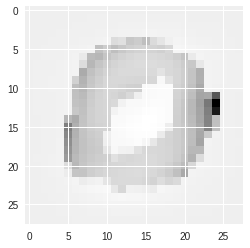

In [5]:
# Solution (Visualization)
%matplotlib inline

import matplotlib.pyplot as plt
plt.imshow(x_tr[0].reshape((28,28)))

### Exercise 2.3: Logistic regression is one of the simplest linear classification algorithms. Fit a logistic regression model to the training images. Compute the accuracy of the classifier on the test images, and the time needed to train the model.¶

Hint: Use LogisticRegression from sklearn.linear_model. To increase speed, change the default solver to 'lbfgs'


In [0]:
# Solution

from time import time
from sklearn.linear_model import LogisticRegression

tic = time()
# Fit a linear regression model
lr = LogisticRegression(solver='lbfgs',verbose=1,n_jobs=-1)
lr.fit(x_tr, y_tr)

# Compute the classification score
print(lr.score(x_tr, y_tr))
print(lr.score(x_va, y_va))
toc = time()
print('The total time is %s seconds ' % (toc-tic))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.3min finished


0.9321833333333334
0.9158
The total time is 260.70635056495667 seconds 


### Exercise 2.4: Apply Principle Component Analysis (PCA) to the training signals by keeping only (a) 25%, (b) 75%, and (c) 95% of the energy. For each of the three cases, output the number of the required principle components.Then, plot the Cumulative Explained Variance over PCA. Finally, choose a random image from the dataset, and show its approximation with the PCA components. 

Hint: For computing the Cumulative Explained Variance over PCA use:
```
pca.explained_variance_ratio_.cumsum()

```

In [9]:
# Solution 
from sklearn.decomposition import PCA

# Fit a PCA model
print("Fitting PCA 25%")
pca25 = PCA(n_components=0.25)
pca25.fit(x_tr)
print("Finished fitting PCA 25%")

print("Fitting PCA 75%")
pca75 = PCA(n_components=0.75)
pca75.fit(x_tr)
print("Finished fitting PCA 75%")

print("Fitting PCA 95%")
pca95 = PCA(n_components=0.95)
pca95.fit(x_tr)
print("Finished fitting PCA 95%\n\n")


# Compute the number of PCA components
print("Number of components for 25% is: " + str(pca25.n_components_))
print("Number of components for 75% is: " + str(pca75.n_components_))
print("Number of components for 95% is: " + str(pca95.n_components_))


Fitting PCA 25%
Finished fitting PCA 25%
Fitting PCA 75%
Finished fitting PCA 75%
Fitting PCA 95%
Finished fitting PCA 95%


Number of components for 25% is: 9
Number of components for 75% is: 120
Number of components for 95% is: 329


In [0]:
# Plot the Cumulative Explained Variance over PCA
cev25 = pca25.explained_variance_ratio_.sum()
cev75 = pca75.explained_variance_ratio_.sum()
cev95 = pca95.explained_variance_ratio_.sum()

print("The Cumulative Explained Variance of the 25% PCA model is: " + str(cev25))
print("The Cumulative Explained Variance of the 75% PCA model is: " + str(cev75))
print("The Cumulative Explained Variance of the 95% PCA model is: " + str(cev95))

The Cumulative Explained Variance of the 25% PCA model is: 0.26420783426145883
The Cumulative Explained Variance of the 75% PCA model is: 0.7505683303267402
The Cumulative Explained Variance of the 95% PCA model is: 0.9501584530941278


(1, 784)


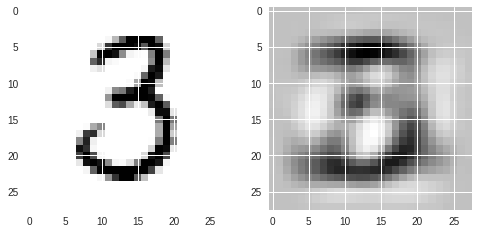

In [0]:
# Choose a random image from the dataset, and show its approximation with the PCA components
random_image = x[np.random.randint(0, x.shape[0], 1)]
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(random_image.reshape(28,28))

# Approximation
plt.subplot(1, 2, 2);
transformed_image = pca25.inverse_transform(pca25.transform(random_image))
print(transformed_image.shape)
plt.imshow(transformed_image[0].reshape(28,28))


### Exercise 2.5: Fit a logistic regression model to the approximation of the training images with 95% of explained variance. Compute the accuracy of the classifier and the time needed to train the model. Compare it to the one obtained in 2.3. What do you observe? 


In [0]:
# Solution
pca95x_tr = pca25.transform(x_tr)
pca95x_va = pca25.transform(x_va)


tic = time()
# Fit a linear regression model
lr = LogisticRegression(solver='lbfgs',verbose=1,n_jobs=-1)
lr.fit(pca95x_tr, y_tr)

# Compute the classification score
print(lr.score(pca95x_tr, y_tr))
print(lr.score(pca95x_va, y_va))
toc = time()
print('The total time is %s seconds ' % (toc-tic))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.7618166666666667
0.7632
The total time is 4.924222469329834 seconds 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished


## Unsupervised learning with sklearn.cluster.KMeans()

###  Exercise 3.1: Generate a set of 6 isotropic Gaussian blobs, with 1000 samples each. Each sample should have 60 features. 

Hint: Use the sklearn.datasets.make_blobs to generate the data

In [7]:
# Solution

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

# Generate the data
x, y = make_blobs(n_samples=1000, n_features=60, centers=6)
x.shape

(1000, 60)

###  Exercise 3.2: Apply PCA to the generated data. Store the first two principle components and their cluster index to a new dataframe.  Visualize the 6 blobs based only on these two components. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


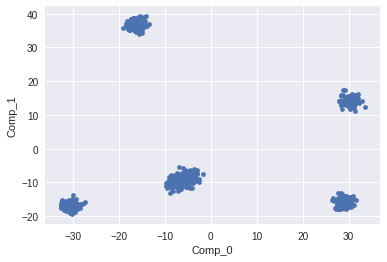

In [12]:
# Solution

# Fit PCA to the data
pca = PCA(n_components=2)
pca.fit(x)
best_comps = pca.components_
pca2x = pca.transform(x)

# Generate a new dataframe and store the first two Principle Components and the true cluster index
df = pd.DataFrame()
df["Comp_0"] = pca2x[:,0]
df["Comp_1"] = pca2x[:,1]
df["Cluster"] = y
df.head()
# Vizualize the data by plotting their representation on the two Principle Components (x and y axis)
df.plot.scatter(0,1)

### Exercise 3.3: Set the number of clusters to 6 and apply Kmeans clustering to the data. Compute the accuracy score between the true labels and the ones estimated by the Kmeans algorithm. 

In [15]:
# Solution

from sklearn.cluster import KMeans

# Fit a Kmean model to the data
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(x)

from scipy.stats import mode

# Uncomment this part to compute the accuracy score
#  y_true: the true cluster index
#  y_kmeans: the cluster index assigned by Kmeans

y_true = df["Cluster"].values
y_kmeans = kmeans.predict(x)
labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)



1.0

### Exercise 3.4: Do the same by clustering the data using only the first 2 principle components. What do you observe? 

In [16]:
# Solution

# Fit a Kmeans model to the first 2 PCA coefficients of the data

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df[["Comp_0", "Comp_1"]].values)

# Uncomment this part to compute the accuracy score
# y_true: the true cluster index
# y_kmeans: the cluster index assigned by Kmeans

y_true = df["Cluster"].values
y_kmeans = kmeans.predict(df[["Comp_0", "Comp_1"]].values)
labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

0.978